In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('lstm_dataset.csv')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas import DataFrame, concat
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn import preprocessing
# df.drop(columns=['date','latitude','longitude','direction_of_travel'], inplace=True)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_after_norm = pd.DataFrame(x_scaled)

In [ ]:
print(data_after_norm.shape)
data_after_norm.head()

(1051704, 9)


,0,1,2,3,4,5,6,7,8
0,0.000000e+00,0.000000,0.0,0.033333,0.833333,0.000786,0.779748,0.806502,0.666667
1,9.508388e-07,0.043478,0.0,0.033333,0.833333,0.000393,0.779748,0.806502,0.666667
2,1.901678e-06,0.086957,0.0,0.033333,0.833333,0.000786,0.779748,0.806502,0.666667
3,2.852516e-06,0.130435,0.0,0.033333,0.833333,0.001048,0.779748,0.806502,0.666667
4,3.803355e-06,0.173913,0.0,0.033333,0.833333,0.002490,0.779748,0.806502,0.666667


In [ ]:
# sampled_data = data_after_norm.sample(frac=0.7, random_state=1)
# print(sampled_data.shape)

In [ ]:
def to_supervised(data, n_in=1, n_out=1):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
  # drop rows with NaN values
	agg.dropna(inplace=True)
	return agg

In [ ]:
values = data_after_norm.values
# values = sampled_data.values
changed = to_supervised(values,4,1)
print(changed.columns)
print(changed.shape)
# changed.drop(['var1(t-4)','var2(t-4)','var3(t-4)','var4(t-4)','var6(t-4)','var7(t-4)','var8(t-4)','var1(t-3)','var2(t-3)','var3(t-3)','var4(t-3)','var6(t-3)','var7(t-3)','var8(t-3)','var1(t-2)','var2(t-2)','var3(t-2)','var4(t-2)','var6(t-2)','var7(t-2)','var8(t-2)'])
changed.drop(changed.columns[[0,1,2,3,5,6,7,8,9,10,11,13,14,15,16,17,18,19,21,22,23,24,25,26,27,29,30,31]], axis=1,inplace=True)
print(changed.shape)
changed.head()

Index(['var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)',
       'var6(t-4)', 'var7(t-4)', 'var8(t-4)', 'var9(t-4)', 'var1(t-3)',
       'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)', 'var6(t-3)',
       'var7(t-3)', 'var8(t-3)', 'var9(t-3)', 'var1(t-2)', 'var2(t-2)',
       'var3(t-2)', 'var4(t-2)', 'var5(t-2)', 'var6(t-2)', 'var7(t-2)',
       'var8(t-2)', 'var9(t-2)', 'var1(t-1)', 'var2(t-1)', 'var3(t-1)',
       'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)',
       'var9(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)'],
      dtype='object')
(1051700, 45)
(1051700, 17)


,var5(t-4),var4(t-3),var3(t-2),var2(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t)
4,0.833333,0.033333,0.0,0.130435,0.001048,0.779748,0.806502,0.666667,0.000004,0.173913,0.0,0.033333,0.833333,0.002490,0.779748,0.806502,0.666667
5,0.833333,0.033333,0.0,0.173913,0.002490,0.779748,0.806502,0.666667,0.000005,0.217391,0.0,0.033333,0.833333,0.007338,0.779748,0.806502,0.666667
6,0.833333,0.033333,0.0,0.217391,0.007338,0.779748,0.806502,0.666667,0.000006,0.260870,0.0,0.033333,0.833333,0.015985,0.779748,0.806502,0.666667
7,0.833333,0.033333,0.0,0.260870,0.015985,0.779748,0.806502,0.666667,0.000007,0.304348,0.0,0.033333,0.833333,0.025550,0.779748,0.806502,0.666667
8,0.833333,0.033333,0.0,0.304348,0.025550,0.779748,0.806502,0.666667,0.000008,0.347826,0.0,0.033333,0.833333,0.025943,0.779748,0.806502,0.666667


In [ ]:
from sklearn.model_selection import train_test_split
X = changed.drop(columns=['var5(t)'])
Y = changed['var5(t)']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.001)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_test.to_csv('task2_test_data.csv')

(1050648, 16) (1050648,) (1052, 16) (1052,)


In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1050648, 1, 16) (1050648,) (1052, 1, 16) (1052,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                13400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13,451
Trainable params: 13,451
Non-trainable params: 0
_________________________________________________________________


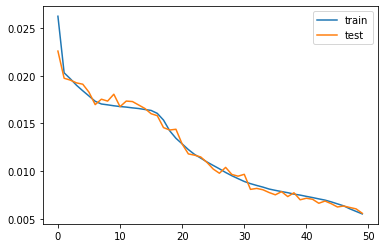

Test RMSE: 0.037


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 
# make a prediction
yhat = model.predict(X_test)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)